# Text Normalization
#### : Pre-processing text for use as input data
1. Cleansing
  - 텍스트 분석에 방해되는 불필요한 문자 및 기호를 사전에 제거
  - ex) HTML, XML 태그 제거
2. Tokenization
  1. Sentence Tokenization
    - 문장, 마침표, 개행문자 등 문장 마지막을 뜻하는 기호를 따라 분리
    - 문장이 가지는 의미가 시맨틱적으로 중요한 요소일 때 사용
  2. Word Tokenization
    - 공백, 콤마, 마침표, 개행문자 등으로 단어를 분리
3. Stop word elimination
  - 필수 문법 요소이나 문맥적으로 큰 의미 없는 단어(ex. is, the, a, will)가 텍스트에 빈번하게 나타나면 중요한 단어로 인지될 수 있어서 사전 제거가 필요함
4. Stemming Lemmatization

# IMDB Review Classification with RNN
- a dataset that categorizes IMDB reviews as positive and negative based on comments

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


- Datasets are made of a one-dimensional array, because the length of the text is different

In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))
print(len(train_input[1]))
print(len(train_input[2]))

218
189
141


In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- Target 0: negative review
- Target 1: positive review

In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


## Split data

In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)
train_input.shape, val_input.shape, train_target.shape, val_target.shape

((20000,), (5000,), (20000,), (5000,))

## Visualize data

- mean and median of the number of words in each review

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


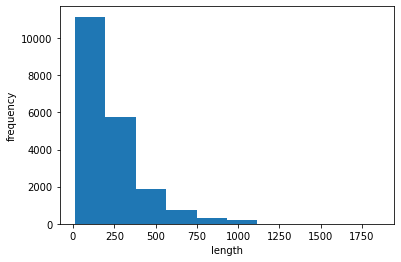

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(lengths)
ax.set_xlabel("length")
ax.set_ylabel("frequency")
plt.show()

- Use only 100 words that are much shorter than the median
- Use padding to match the length of each review to 100

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100) # cut the front part of sequences

print(train_seq.shape) # the number of data = 2000, length of each data = 100

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)

# RNN Model

- 100 : Length of each text data
- 500 : Numer of words

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

- one-hot encoding

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)
print(val_oh.shape)

(5000, 100, 500)


- model structure

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


- model fitting

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 47s 135ms/step - loss: 0.6977 - accuracy: 0.5094 - val_loss: 0.6916 - val_accuracy: 0.5338
Epoch 2/100
313/313 [==============================] - 41s 131ms/step - loss: 0.6828 - accuracy: 0.5623 - val_loss: 0.6780 - val_accuracy: 0.5792
Epoch 3/100
313/313 [==============================] - 72s 230ms/step - loss: 0.6685 - accuracy: 0.6031 - val_loss: 0.6649 - val_accuracy: 0.6114
Epoch 4/100
313/313 [==============================] - 57s 183ms/step - loss: 0.6525 - accuracy: 0.6366 - val_loss: 0.6478 - val_accuracy: 0.6438
Epoch 5/100
313/313 [==============================] - 41s 131ms/step - loss: 0.6280 - accuracy: 0.6789 - val_loss: 0.6241 - val_accuracy: 0.6850
Epoch 6/100
313/313 [==============================] - 41s 131ms/step - loss: 0.6086 - accuracy: 0.7050 - val_loss: 0.6063 - val_accuracy: 0.7042
Epoch 7/100
313/313 [==============================] - 42s 134ms/step - loss: 0.5897 - accuracy: 0.7224 - val_loss: 0.5904 -

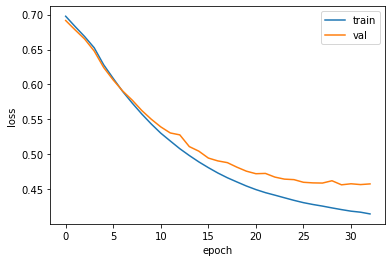

In [ ]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(['train', 'val'])
plt.show()

In [ ]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


# Word Embedding
#### : Replace each word with a real number vector of fixed size.
- It solves memory inefficiencies in one-hot encoding.
- Since it receives an integer data as an input, train_seq can be used.

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 52s 162ms/step - loss: 0.6938 - accuracy: 0.5105 - val_loss: 0.6909 - val_accuracy: 0.5236
Epoch 2/100
313/313 [==============================] - 51s 162ms/step - loss: 0.6747 - accuracy: 0.5947 - val_loss: 0.6529 - val_accuracy: 0.6548
Epoch 3/100
313/313 [==============================] - 53s 169ms/step - loss: 0.6280 - accuracy: 0.6870 - val_loss: 0.6142 - val_accuracy: 0.6996
Epoch 4/100
313/313 [==============================] - 52s 166ms/step - loss: 0.5937 - accuracy: 0.7228 - val_loss: 0.5887 - val_accuracy: 0.7214
Epoch 5/100
313/313 [==============================] - 52s 165ms/step - loss: 0.5699 - accuracy: 0.7440 - val_loss: 0.5712 - val_accuracy: 0.7298
Epoch 6/100
313/313 [==============================] - 51s 163ms/step - loss: 0.5495 - accuracy: 0.7571 - val_loss: 0.5569 - val_accuracy: 0.7476
Epoch 7/100
313/313 [==============================] - 51s 164ms/step - loss: 0.5361 - accuracy: 0.7618 - val_loss: 0.5451 -

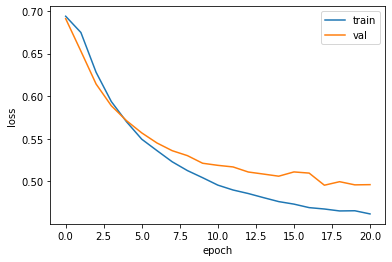

In [ ]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(['train', 'val'])
plt.show()